In [1]:
import pandas as pd
import numpy as np
import os 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
%matplotlib inline

In [8]:
data_dir='Data/training_files/'

In [9]:
user_names=glob.glob(os.path.join(data_dir,'*'))

In [10]:
user_names

['Data/training_files\\user12',
 'Data/training_files\\user15',
 'Data/training_files\\user16',
 'Data/training_files\\user20',
 'Data/training_files\\user21',
 'Data/training_files\\user23',
 'Data/training_files\\user29',
 'Data/training_files\\user35',
 'Data/training_files\\user7',
 'Data/training_files\\user9']

In [11]:
files_dict={}
for u in user_names:
    files_dict[os.path.basename(u)]=glob.glob(os.path.join(u,'*'))

In [12]:
len(files_dict.values())

10

In [13]:
final_df=pd.DataFrame()
for u in user_names:
    files=files_dict[os.path.basename(u)]
    for f in files:
        csv=pd.read_csv(f)
        csv['user']=os.path.basename(u)
        csv['session']=os.path.basename(f)
        final_df=pd.concat([final_df,csv],ignore_index=True)

In [14]:
final_df.head()

,record timestamp,client timestamp,button,state,x,y,user,session
0,0.000,0.000,NoButton,Move,1043,410,user12,session_2144641057
1,0.232,0.094,NoButton,Move,1024,410,user12,session_2144641057
2,0.232,0.094,NoButton,Move,1019,410,user12,session_2144641057
3,0.232,0.234,NoButton,Move,979,409,user12,session_2144641057
4,0.342,0.234,NoButton,Move,974,411,user12,session_2144641057


In [15]:
final_df.shape

(2253816, 8)

C:\Users\Tomasz\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Liczba akcji użytkowników'}, xlabel='user'>

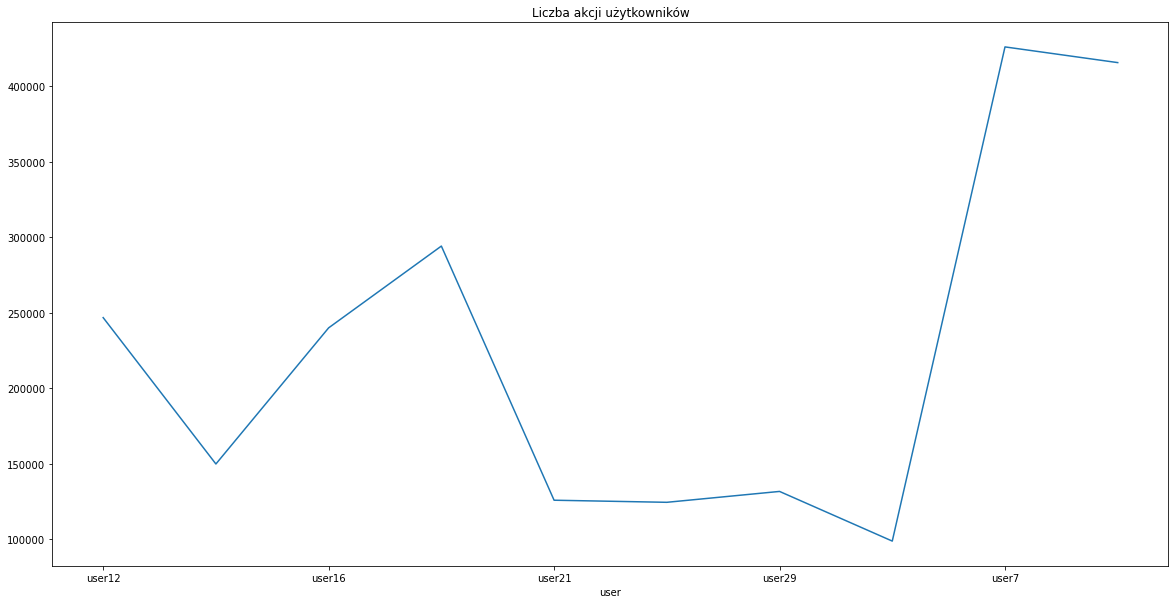

In [47]:
final_df.groupby(by='user').count()['state'].plot(
    title='Liczba akcji użytkowników',figsize=(20,10))

C:\Users\Tomasz\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Liczba akcji a pomiar'}, xlabel='session'>

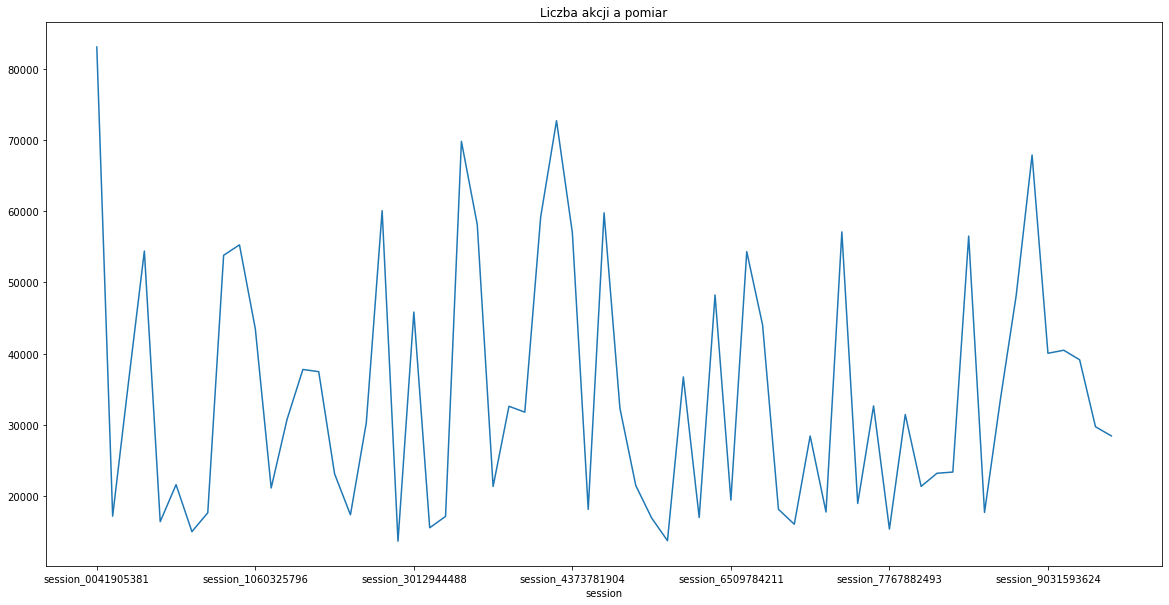

In [51]:
final_df.groupby(by='session').count()['state'].plot(
    title='Liczba akcji a pomiar',figsize=(20,10))

In [22]:
features=[]
user_names=pd.Series.unique(final_df['user'])

In [45]:
user_names

array(['user12', 'user15', 'user16', 'user20', 'user21', 'user23',
       'user29', 'user35', 'user7', 'user9'], dtype=object)

In [23]:
#Wyliczenie odchylenia standardowego i średniej wartości dla x i y,
#dla każdego użytkownika
for u in user_names:
    feature=[]
    df=final_df[final_df['user']==u]
    feature.append(df['x'].mean())
    feature.append(df['y'].mean())
    feature.append(df['x'].std())
    feature.append(df['y'].std())
    features.append(feature)
features=np.stack(features)

In [17]:
#Uzyskana macierz cech
features

array([[ 703.78384193,  462.65414627,  481.32379259,  391.93025308],
       [ 639.00490258,  512.62324824,  462.04241291,  289.90901904],
       [ 485.34668772,  476.35383635,  382.62115276,  280.95693731],
       [ 407.65887484,  388.6608531 ,  486.00495764,  449.07665455],
       [ 347.86389372,  329.06846606,  600.54121094,  581.92486562],
       [ 338.35888975,  318.05985644,  265.96090827,  178.33674449],
       [ 338.54407177,  322.3602022 , 1123.22969913, 1110.62028669],
       [ 363.37093153,  345.24447254,  343.85209689,  282.22043388],
       [ 322.56059475,  350.9907337 ,  303.30713748,  278.6551888 ],
       [ 374.11140381,  322.12544627,  450.62198499,  401.51554087]])

In [18]:
scaler=StandardScaler()
features=scaler.fit_transform(features)

In [19]:
pca=PCA(n_components=2)

In [20]:
two_d=pca.fit_transform(features)

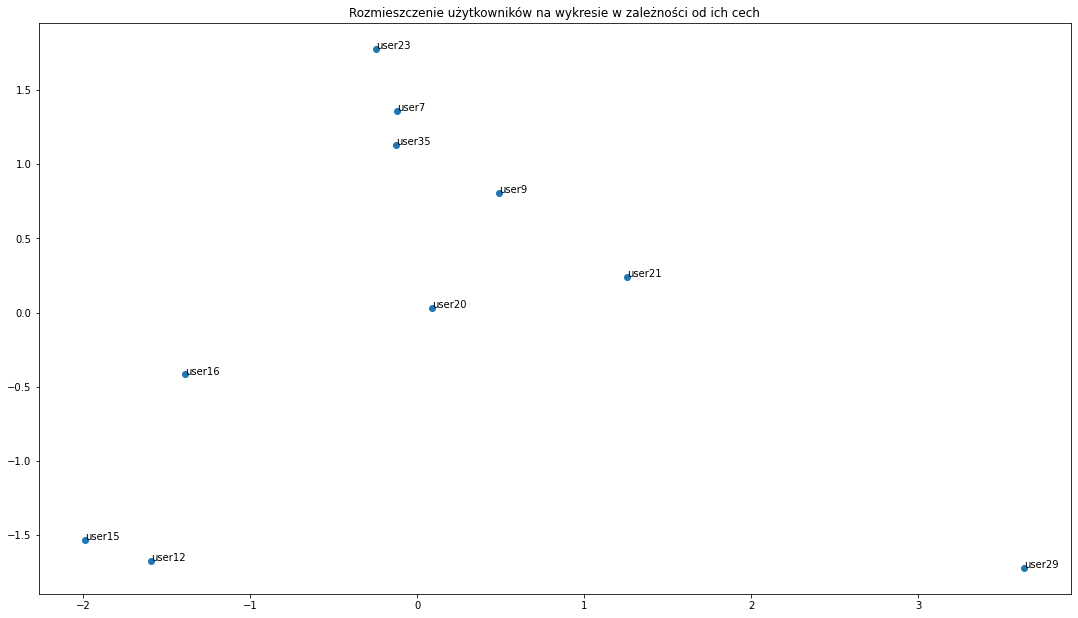

In [30]:
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
ax.scatter(two_d[:,0],two_d[:,1])
ax.set_title("Rozmieszczenie użytkowników na wykresie w zależności od ich cech")

for i, txt in enumerate(user_names):
    ax.annotate(txt, (two_d[i,0],two_d[i,1]))

In [25]:
#Ograniczenie Klastrów do liczby użytkowników
cluster_vals=range(1,11)
distortions=[]
for cluster in cluster_vals:
    kmeans=KMeans(n_clusters=cluster)
    cluster_index=kmeans.fit_predict(features)
    distortions.append(sum(np.min(cdist(features, kmeans.cluster_centers_, 'euclidean'), axis=1))/features.shape[0])

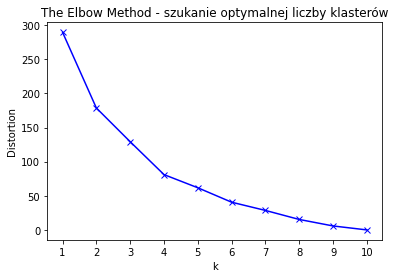

In [26]:
plt.xticks(cluster_vals)
plt.plot(cluster_vals,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method - szukanie optymalnej liczby klasterów')
plt.show()

In [28]:
#Wyraźna zmiana tendencji między 3 a 4 klastrem

In [31]:
kmeans=KMeans(n_clusters=3)
cluster_index=kmeans.fit_predict(features)

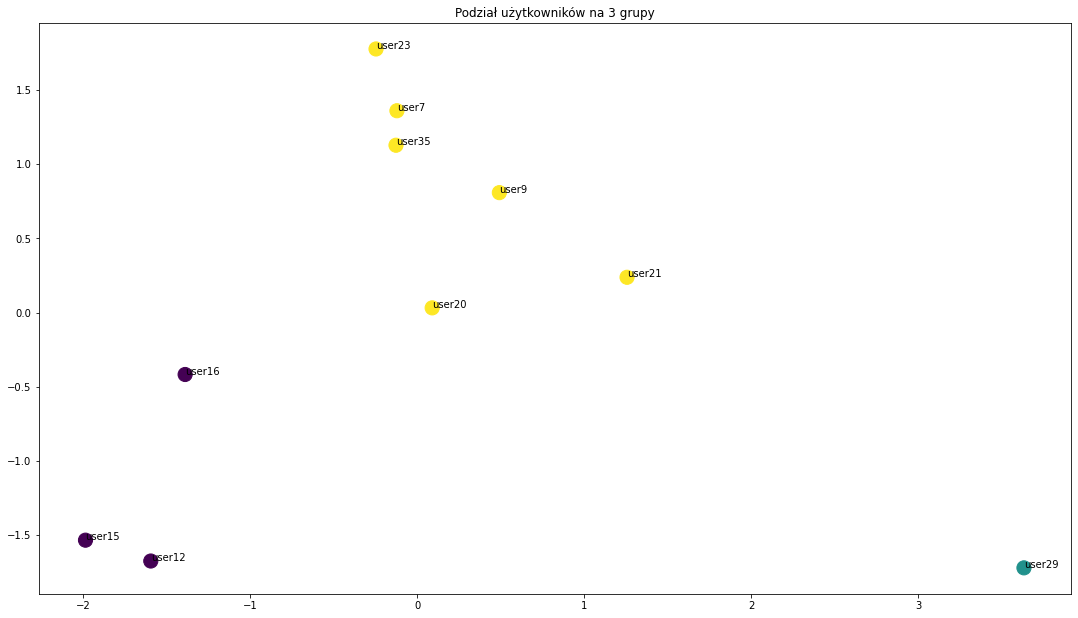

In [32]:
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
ax.scatter(two_d[:,0],two_d[:,1],c=cluster_index,marker='o',s=200)
ax.set_title("Podział użytkowników na 3 grupy")
for i, txt in enumerate(user_names):
    ax.annotate(txt, (two_d[i,0],two_d[i,1]))

In [33]:
#Indywidualne zakwalifikowanie użytkowników do 3 wydzielonych grup

<AxesSubplot:title={'center':'Dystrybucja X'}, xlabel='x'>

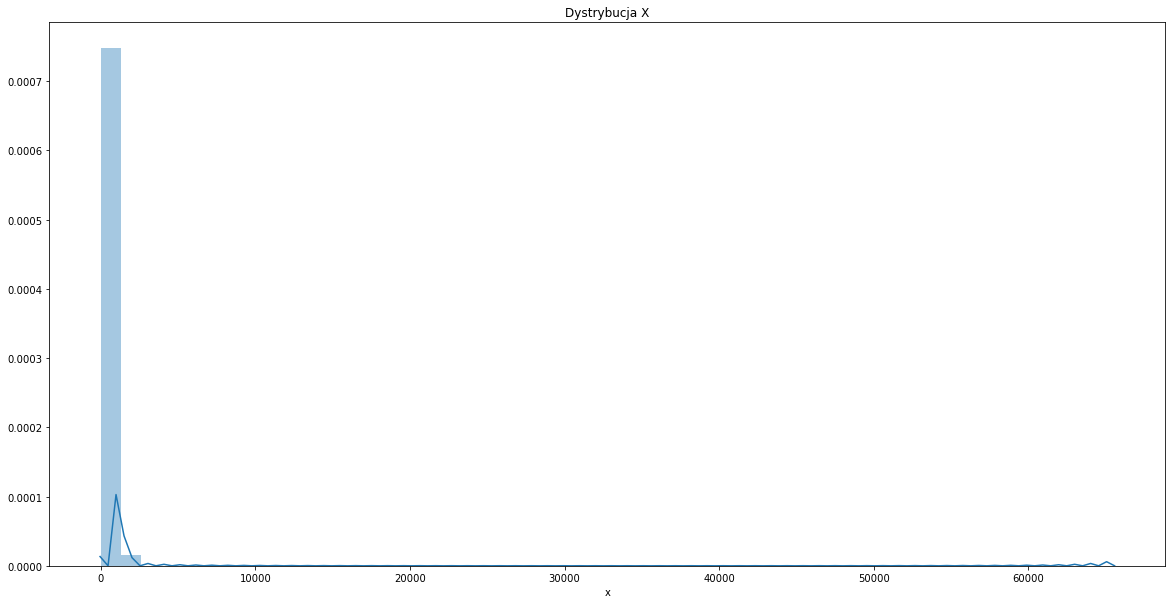

In [57]:
plt.figure(figsize=(20,10))
plt.title('Dystrybucja X')
sns.distplot(final_df['x'])

<AxesSubplot:title={'center':'Dystrybucja Y'}, xlabel='y'>

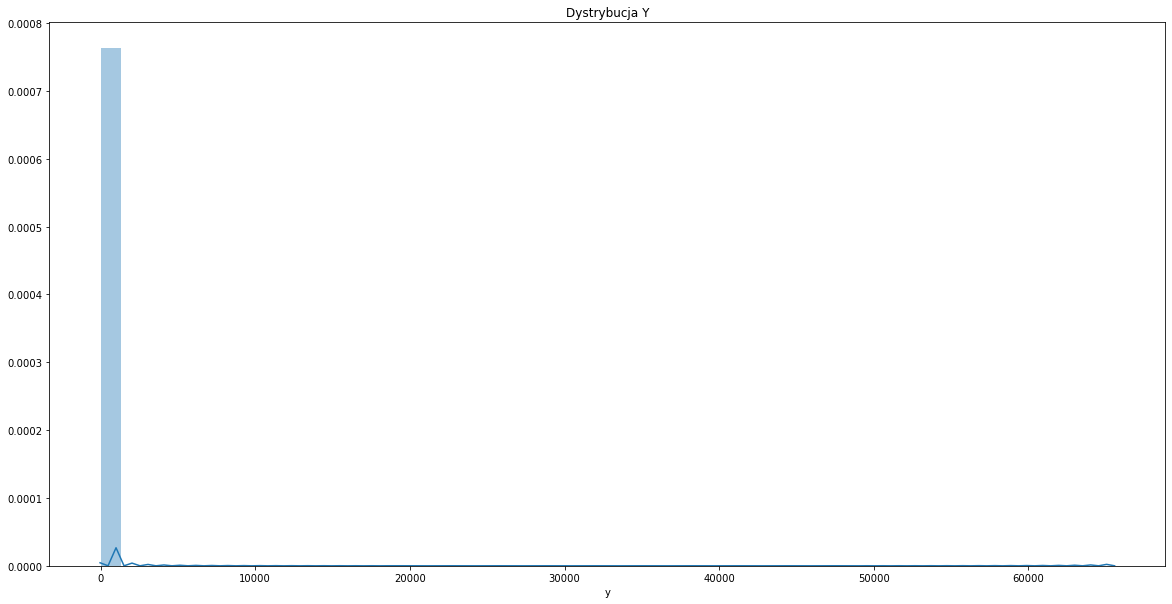

In [56]:
plt.figure(figsize=(20,10))
plt.title("Dystrybucja Y")
sns.distplot(final_df['y'])

In [77]:
sample_df=final_df.groupby('user')
sample_df=sample_df.apply(lambda x: x.sample(100))

In [78]:
for col in sample_df.columns: 
    print(col) 

record timestamp
client timestamp
button
state
x
y
user
session


In [79]:
sample_df.shape

(1000, 8)

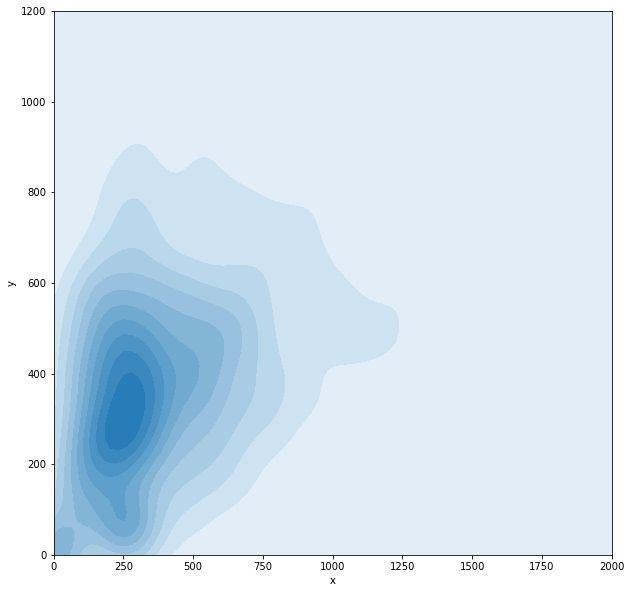

In [80]:
plt.figure(figsize=(10,10))
plt.xlim(0, 2000)
plt.ylim(0, 1200)

ax = sns.kdeplot(sample_df['x'],sample_df['y'], shade=True)

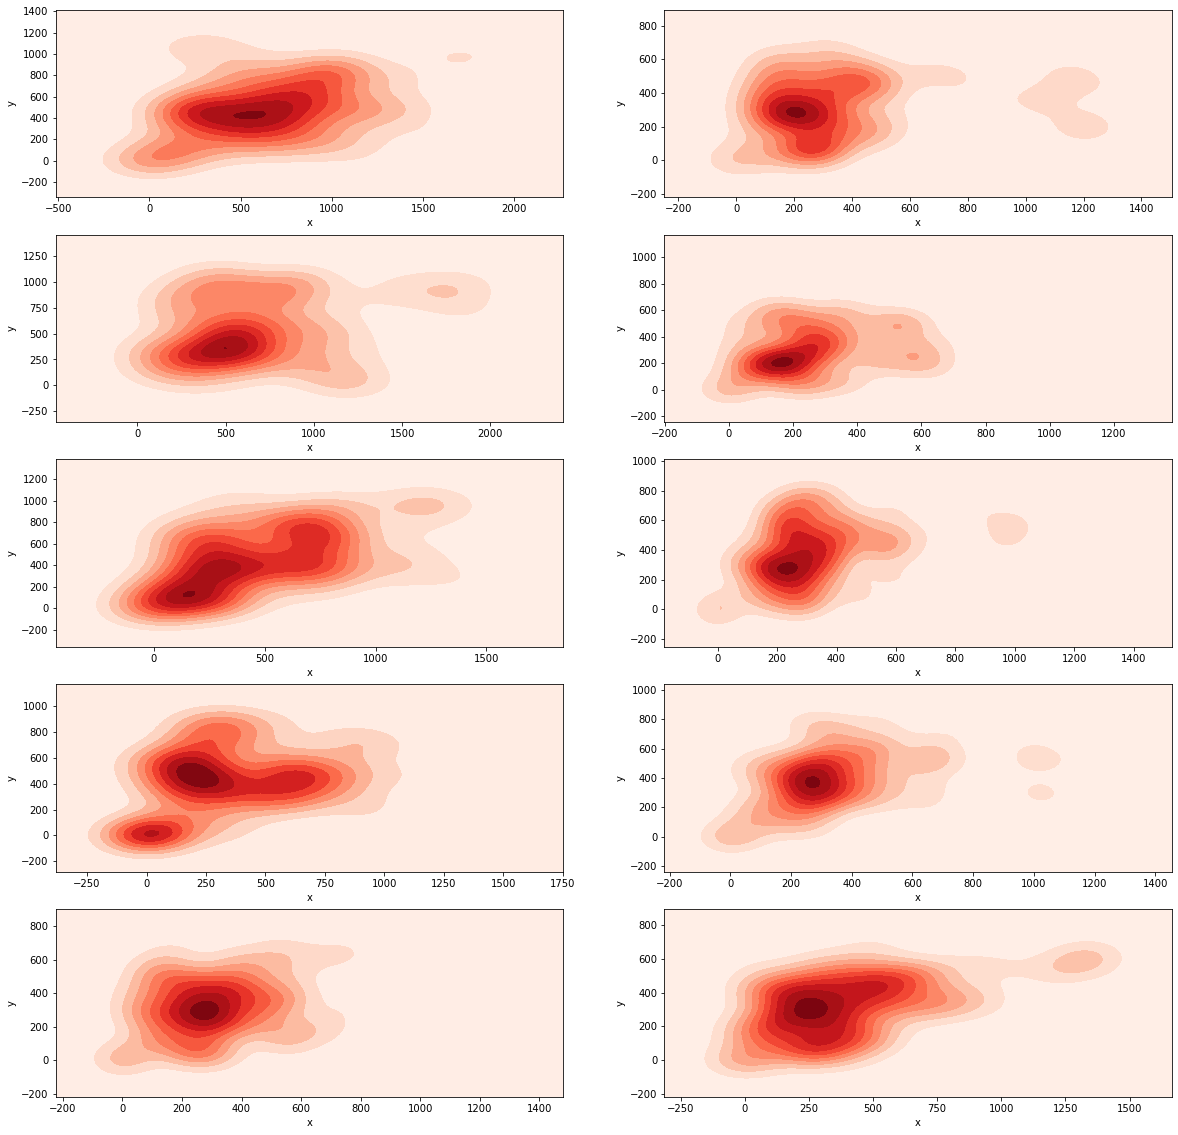

In [81]:
i=0
j=0
fig,axes=plt.subplots(5,2,figsize=(20,20))
for u in user_names:
    udf=sample_df[sample_df['user']==os.path.basename(u)]
    if(i==5):
        j=j+1
        i=0
    sns.kdeplot(udf['x'],udf['y'], shade=True,cmap="Reds",ax=axes[i,j])
    i=i+1

In [82]:
sessions=pd.Series.unique(final_df['session'])

In [88]:
sessions.size

65

Czas sesji w minutach 198.383367


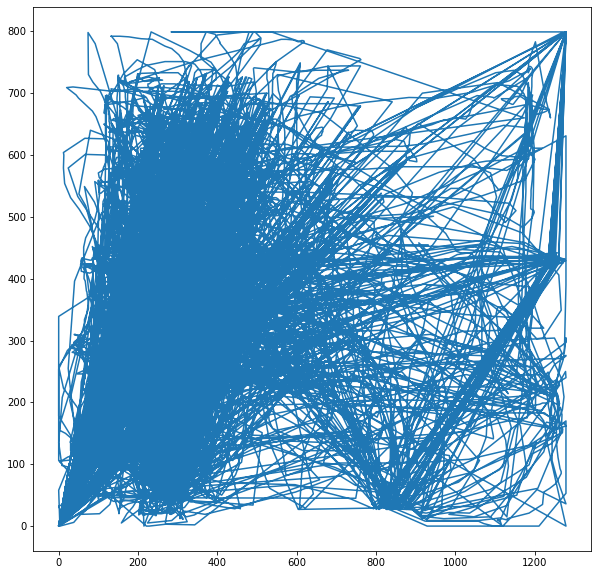

In [93]:
sess_df=final_df[final_df['session']==sessions[33]]
plt.figure(figsize=(10,10))
plt.plot(sess_df['x'],sess_df['y'])
print('Czas sesji w minutach %f'%((np.max(sess_df['record timestamp']))/60))